### Linear and Logistic Regression ###

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

In [45]:
df = pd.read_csv('Estuarine_Crocodile.csv')
df.head()

,Species,CommonName,HeadLength,BodyLength
0,Crocodylus porosus,Estuarine Crocodile,24,161
1,Crocodylus porosus,Estuarine Crocodile,24,179
2,Crocodylus porosus,Estuarine Crocodile,32,226
3,Crocodylus porosus,Estuarine Crocodile,35,259
4,Crocodylus porosus,Estuarine Crocodile,40,287


In [46]:
df['BodyLength'].corr(df['HeadLength'])

0.9898911439276338

In [47]:
df.corr()

,HeadLength,BodyLength
HeadLength,1.000000,0.989891
BodyLength,0.989891,1.000000


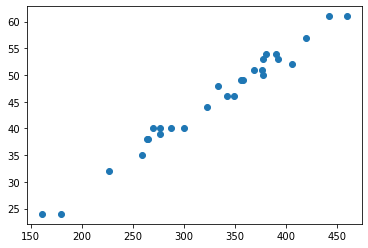

In [48]:
plt.scatter(x = df['BodyLength'], y = df['HeadLength'])

In [72]:
sns.scatter(x = df['BodyLength'], y = df['HeadLength'])

AttributeError: module 'seaborn' has no attribute 'scatter'

In [ ]:
sns.lmplot(data = df, x = 'HeadLength', y = 'BodyLength')


### Linear Regression ###

In [54]:
X = df['HeadLength']
Y = df['BodyLength']

x = sm.add_constant(X)

In [ ]:
#model = sm.OLS(Y,X)
#results = model.fit()
#predictions = results.predict(X)

In [55]:
model = sm.OLS(Y, X)
print(model)

In [63]:
results = model.fit()
print(results)

In [64]:
predictions = results.predict(X)
print(predictions)

0      167.297596
1      152.749979
2      181.845213
3      152.749979
4      320.047575
          ...    
362    130.928554
363     58.190468
364    109.107128
365    160.023788
366    225.488065
Length: 367, dtype: float64


In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             BodyLength   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.504e+04
Date:                Sat, 07 Nov 2020   Prob (F-statistic):                    1.32e-41
Time:                        13:42:27   Log-Likelihood:                         -107.03
No. Observations:                  28   AIC:                                      216.1
Df Residuals:                      27   BIC:                                      217.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HeadLength     7.2738      0.046    158.225      0.000       7.179       7.368
==============================================================================
Omnibus:                        0.960   Durbin-Watson:                   2.299
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.646
Skew:                           0.366   Prob(JB):                        0.724
Kurtosis:                       2.867   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
print(X)

0      23
1      21
2      25
3      21
4      44
       ..
362    18
363     8
364    15
365    22
366    31
Name: NumberOfAwakings, Length: 367, dtype: int64


In [ ]:
results.predict(X)

In [69]:
Y_pred = results.predict(X)
print(Y_pred)

0      167.297596
1      152.749979
2      181.845213
3      152.749979
4      320.047575
          ...    
362    130.928554
363     58.190468
364    109.107128
365    160.023788
366    225.488065
Length: 367, dtype: float64


In [71]:
plt.plot(X['HeadLength'], Y_pred, 'o')

KeyError: 'HeadLength'

In [ ]:
# Second data set
data = pd.read_csv('Fitbit2.csv')
data.head()

In [ ]:
#1. correlation matrix
#2. scatterplot MinutesOfBeingAwake versus NumberOfAwakings
#3. regression with statsmodels: [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]

In [50]:
data.corr()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,...,0.030490,0.017460,0.292790,-0.041630,0.064943,0.011485,0.040965,0.048411,0.021207,0.005841
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,...,0.106591,0.133405,0.779678,-0.024671,0.006498,0.130986,0.128463,0.089991,0.083499,-0.097077
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,...,0.091095,0.134550,1.000000,-0.056472,0.069438,0.129442,0.126663,0.107858,0.075439,-0.122106
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,...,0.043459,0.075864,0.382940,-0.243848,0.296749,0.069464,0.057192,0.111600,0.092766,-0.032347
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,...,0.178387,0.208539,0.160632,-0.069168,0.071185,0.204242,0.251996,0.069396,0.058520,-0.107068
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,...,0.087150,0.105406,0.455272,0.202433,-0.197896,0.105048,0.101216,0.020973,0.040472,-0.066958
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,...,0.100498,0.123034,0.348113,-0.098541,0.110282,0.114950,0.092485,0.191620,0.136397,0.105570
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,...,0.099859,0.115641,0.759310,-0.111718,0.103940,0.108018,0.106693,0.120500,0.073853,-0.085153
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,...,0.022757,-0.004992,-0.246853,-0.074707,0.044292,-0.005804,-0.020122,-0.074408,-0.064989,-0.004207
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,...,0.780512,0.997184,0.129442,-0.033913,0.094152,1.000000,0.807964,0.148113,0.095999,-0.127980


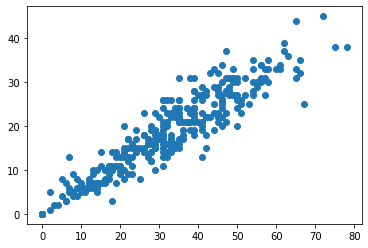

In [51]:
plt.scatter(data['MinutesOfBeingAwake'], data['NumberOfAwakings'])
plt.show()

In [ ]:
x = data['NumberOfAwakings']
y = data['NumberOfAwakings']
x = sm.add_constant(x)

In [53]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       NumberOfAwakings   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.213e+34
Date:                Sat, 07 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:36:08   Log-Likelihood:                 12194.
No. Observations:                 367   AIC:                        -2.438e+04
Df Residuals:                     365   BIC:                        -2.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.887e-15   8.51e-17     22.173      0.000    1.72e-15    2.05e-15
NumberOfAwakings     1.0000   4.38e-18   2.28e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                       64.859   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.962
Skew:                          -1.179   Prob(JB):                     4.81e-20
Kurtosis:                       2.489   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# y = b0 + b1 = x
#[MinutesOfBeingAwake] = b0 + b1 * [NumberOfBeingAwakings]


In [62]:
# how to calculate the intercept and slope:

from scipy import stats
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 1.6405141436199793
The intercept is: 1.4381033523783202
